## Backpropagation with numpy
#### Author: Leonardo de Holanda Bonifácio (leohb2@gmail.com)

In [1]:
import numpy as np

Input and logic gates for training

In [2]:
input_ = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])

target_AND = np.array([[0.0],
                       [0.0],
                       [0.0],
                       [1.0]])

target_OR = np.array([[0.0],
                      [1.0],
                      [1.0],
                      [1.0]])

target_XOR = np.array([[0.0],
                       [1.0],
                       [1.0],
                       [0.0]])

In [3]:
# Generate random weights for the layers
def initialize_weights(input_size, hidden_size):
    weights0 = np.random.random((hidden_size ,input_size)) 
    weights1 = np.random.random((input_size,1)) 
    
    return weights0, weights1

In [4]:
weights0, weights1 = initialize_weights(4,2)

print(weights0)
print()
print(weights1)

[[0.18118771 0.45277076 0.10527868 0.07164529]
 [0.46292412 0.49967987 0.1092007  0.32796895]]

[[0.17586765]
 [0.17254471]
 [0.76355443]
 [0.37186776]]


In [5]:
# Optional bias
def create_bias():
    bias = np.random.random()
    
    return bias

In [6]:
create_bias()

0.692928466778588

In [7]:
# Error calculation
def error(target, output):
    return target - output

In [8]:
# Sigmoid function. If derivative == True, returns the derivative of x.
def sigmoid(x, derivative=False):
	if not derivative:
		return 1 / (1 + np.exp (-x))
	else:
		out = sigmoid(x)
		return out * (1 - out)

### Methods and tests

In [9]:
def training(input_, target, epochs, learning_rate, verbose = False):
    weights0, weights1 = initialize_weights(4,2)
    bias = 1 # Melhor valor verificado para a aplicação
    loss_val = []
    
    for j in range(epochs+1):
        # Forward 
        layer0 = input_ # Entrada
        layer1 = sigmoid(np.dot(layer0, weights0) + bias) # Hidden 
        layer2 = sigmoid(np.dot(layer1, weights1) + bias) # Output
        
        # Backward
        layer2_error = error(target, layer2)
        layer2_delta = layer2_error*sigmoid(layer2, derivative=True)

        layer1_error = layer2_delta.dot(weights1.T)    
        layer1_delta= layer1_error * sigmoid(layer1,derivative=True)
        
        # Weights update
        weights1 += layer1.T.dot(layer2_delta) * learning_rate
        weights0 += layer0.T.dot(layer1_delta) * learning_rate        
        
        error_meansum = np.mean(np.abs(layer2_error))
        error_meansum_str = str(round(np.mean(np.abs(layer2_error)),4))
                               
        loss_val.append(error_meansum)
        
        if (j% n_display) == 0: # Show progress
            print ("Loss (Mean Sum) in the iteration", j,':', error_meansum_str)
            if(verbose == True): # Ouput layer visualization
                print("Ouput:")
                print(layer2)
                print()
                
    return loss_val

#### Tests

In [10]:
epochs = 10000
n_display = epochs/ 10 
l_rate = 0.7

In [11]:
# AND gate
loss_AND = training(input_, target_AND, epochs, l_rate, verbose = True)

Loss (Mean Sum) in the iteration 0 : 0.7164
Ouput:
[[0.93167191]
 [0.94095602]
 [0.93962166]
 [0.94667901]]

Loss (Mean Sum) in the iteration 1000 : 0.1995
Ouput:
[[2.79894973e-10]
 [2.55940928e-01]
 [2.56139834e-01]
 [7.14026480e-01]]

Loss (Mean Sum) in the iteration 2000 : 0.1944
Ouput:
[[2.08123669e-14]
 [2.49303745e-01]
 [2.49384683e-01]
 [7.21050730e-01]]

Loss (Mean Sum) in the iteration 3000 : 0.1926
Ouput:
[[1.22923559e-17]
 [2.46904878e-01]
 [2.46945483e-01]
 [7.23506344e-01]]

Loss (Mean Sum) in the iteration 4000 : 0.1916
Ouput:
[[2.07303568e-20]
 [2.45625526e-01]
 [2.45647787e-01]
 [7.24804917e-01]]

Loss (Mean Sum) in the iteration 5000 : 0.191
Ouput:
[[6.90546438e-23]
 [2.44812496e-01]
 [2.44825416e-01]
 [7.25626680e-01]]

Loss (Mean Sum) in the iteration 6000 : 0.1906
Ouput:
[[3.76550540e-25]
 [2.44240360e-01]
 [2.44248200e-01]
 [7.26203307e-01]]

Loss (Mean Sum) in the iteration 7000 : 0.1902
Ouput:
[[3.00260665e-27]
 [2.43810425e-01]
 [2.43815361e-01]
 [7.26635678e-01

In [12]:
# OR gate
loss_OR = training(input_, target_OR, epochs, l_rate)

Loss (Mean Sum) in the iteration 0 : 0.2718
Loss (Mean Sum) in the iteration 1000 : 0.0108
Loss (Mean Sum) in the iteration 2000 : 0.0045
Loss (Mean Sum) in the iteration 3000 : 0.0027
Loss (Mean Sum) in the iteration 4000 : 0.0019
Loss (Mean Sum) in the iteration 5000 : 0.0014
Loss (Mean Sum) in the iteration 6000 : 0.0011
Loss (Mean Sum) in the iteration 7000 : 0.0009
Loss (Mean Sum) in the iteration 8000 : 0.0008
Loss (Mean Sum) in the iteration 9000 : 0.0007
Loss (Mean Sum) in the iteration 10000 : 0.0006


In [13]:
# XOR gate
loss_XOR = training(input_, target_XOR, epochs, l_rate)

Loss (Mean Sum) in the iteration 0 : 0.4985
Loss (Mean Sum) in the iteration 1000 : 0.4889
Loss (Mean Sum) in the iteration 2000 : 0.1459
Loss (Mean Sum) in the iteration 3000 : 0.0571
Loss (Mean Sum) in the iteration 4000 : 0.0489
Loss (Mean Sum) in the iteration 5000 : 0.0529
Loss (Mean Sum) in the iteration 6000 : 0.0478
Loss (Mean Sum) in the iteration 7000 : 0.0352
Loss (Mean Sum) in the iteration 8000 : 0.0264
Loss (Mean Sum) in the iteration 9000 : 0.0208
Loss (Mean Sum) in the iteration 10000 : 0.0171


### Graphic Visualization

Text(0.5, 1.0, 'Loss function')

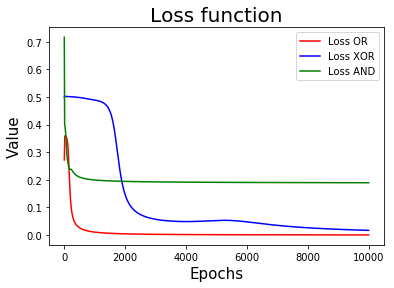

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_OR, label = 'Loss OR', color = 'red')
plt.plot(loss_XOR, label = 'Loss XOR', color = 'blue')
plt.plot(loss_AND, label = 'Loss AND', color = 'green')
plt.legend()
plt.xlabel('Epochs', size = 15)
plt.ylabel('Value', size = 15)
plt.title('Loss function', size = 20)